# Tanzania Water Wells Classification Project

# Business Understanding
Access to clean and functional water sources is crucial for public health, agriculture, and economic development in Tanzania. Many rural communities rely on water wells, but many of these wells become non-functional due to poor maintenance, inadequate infrastructure, or environmental conditions. Efficient resource allocation and proactive maintenance can significantly improve water accessibility and sustainability.


## Goal:
Predict the functionality of water wells in Tanzania using machine learning classification models.

## Objectives
This study aims to develop a predictive machine learning model to classify water wells as functional, non-functional, or in need of repair. The insights will support efficient resource allocation, maintenance planning, and sustainable water management.

Key Objectives
1. Develop and compare multiple machine learning classification models to determine the best-performing approach for predicting well functionality.
2. Identify the most influential factors affecting well status, including water source, infrastructure, management, and payment system.
3. Detect patterns in well failures to help government agencies, NGOs, and local communities allocate resources efficiently.
4. Provide actionable insights to improve water infrastructure and well maintenance strategies based on predictive modeling results.




## Research Questions
1. Which machine learning classification model provides the highest accuracy in predicting well functionality?
2. How well can the model differentiate between functional, non-functional, and repair-needed wells?
3. What are the most significant factors that influence whether a well is functional, non-functional, or in need of repair?
4. How do infrastructure-related factors like extraction type, well age, and management type affect well performance?
5. Do certain geographic locations or regions have a higher concentration of non-functional wells?
6. How can machine learning predictions be used to prioritize well maintenance and repairs?
7. What strategies can be implemented to reduce well failures and improve sustainable water access?



## Stakeholders & Beneficiaries
- Government & Policy Makers: Use model predictions to prioritize funding and infrastructure improvements.
- Non-Governmental Organizations (NGOs): Identify regions most in need of water infrastructure investments.
- Community Water Management Committees: Plan preventive maintenance strategies based on well failure risks.
- Local Engineers & Planners: Use insights from the model to optimize well construction & repair decisions.



## Data Source
DrivenData. (2015). Pump it Up: Data Mining the Water Table. Retrieved [Month Day Year] from https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table.

# Data understanding

In [68]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
import folium
from folium.plugins import MarkerCluster
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import time
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
# Load the datasets
train_values = pd.read_csv("Training_set_values.csv")
train_labels = pd.read_csv("Training_set _labels.csv")
test_values = pd.read_csv("Test_Values.csv")

In [5]:
# Display the first few rows to verify loading
print(train_values.head())
print(train_labels.head())
print(test_values.head())

      id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  ... payment_type  \
0  34.938093  -9.856322                  none            0  ...     annually   
1  34.698766  -2.147466              Zahanati            0  ...    never pay   
2  37.460664  -3.821329           Kwa Mahundi            0  ...   per bucket   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  ...    never pay   
4  31.130847  -1.825359               Shuleni            0  ...    never pay   

  water_quality quality_group      quantity  quant

In [6]:
# Merge training values with labels
train_data = train_values.merge(train_labels, on="id")

In [7]:
# Display dataset info
print(train_data.info())
print(test_values.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [8]:
# Check first few rows
train_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [9]:
train_data.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


# Data cleaning

In [10]:
# Checking Duplicates
train_data.duplicated().sum()

0

In [11]:
train_data.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [12]:
# Fill missing categorical values with "Unknown"
categorical_columns = ["funder", "installer", "wpt_name", "subvillage", 
                       "public_meeting", "scheme_management", "scheme_name", "permit"]
train_data[categorical_columns] = train_data[categorical_columns].fillna("Unknown")


print(train_data[categorical_columns].isna().sum())

numeric_columns = train_data.select_dtypes(include=["number"]).columns
print(train_data[numeric_columns].isna().sum())

funder               0
installer            0
wpt_name             0
subvillage           0
public_meeting       0
scheme_management    0
scheme_name          0
permit               0
dtype: int64
id                   0
amount_tsh           0
gps_height           0
longitude            0
latitude             0
num_private          0
region_code          0
district_code        0
population           0
construction_year    0
dtype: int64


In [13]:
# Drop rows with missing values in specific columns
train_data.dropna(subset=categorical_columns, inplace=True)

print(train_data.isna().sum())

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
s

In [14]:
# Fill boolean missing values with the most frequent value
boolean_fill_cols = ["public_meeting", "permit"]
for col in boolean_fill_cols:
    train_data[col] = train_data[col].fillna(train_data[col].mode()[0])
    test_values[col] = test_values[col].fillna(test_values[col].mode()[0])

In [15]:
# Confirm no missing values
train_data.isnull().sum().sort_values(ascending=False)

id                       0
scheme_name              0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
permit                   0
scheme_management        0
amount_tsh               0
recorded_by              0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
w

## Featrure Engineering

In [16]:
# Convert 'date_recorded' to datetime format
train_data["date_recorded"] = pd.to_datetime(train_data["date_recorded"])
test_values["date_recorded"] = pd.to_datetime(test_values["date_recorded"])

train_data["year_recorded"] = train_data["date_recorded"].dt.year
test_values["year_recorded"] = test_values["date_recorded"].dt.year

print(train_data[["date_recorded", "year_recorded"]].head())
print(test_values[["date_recorded", "year_recorded"]].head())

  date_recorded  year_recorded
0    2011-03-14           2011
1    2013-03-06           2013
2    2013-02-25           2013
3    2013-01-28           2013
4    2011-07-13           2011
  date_recorded  year_recorded
0    2013-02-04           2013
1    2013-02-04           2013
2    2013-02-01           2013
3    2013-01-22           2013
4    2013-03-27           2013


This will be important in further analysis as it can allow the models to be used to detect trend over time, improves machine learning perfomance and facilitates in further analysis and visualization. 

In [17]:
# Handle unrealistic well ages 
train_data["well_age"] = train_data["year_recorded"] - train_data["construction_year"]
test_values["well_age"] = test_values["year_recorded"] - test_values["construction_year"]

print(train_data[["year_recorded", "construction_year", "well_age"]].head())
print(test_values[["year_recorded", "construction_year", "well_age"]].head())

   year_recorded  construction_year  well_age
0           2011               1999        12
1           2013               2010         3
2           2013               2009         4
3           2013               1986        27
4           2011                  0      2011
   year_recorded  construction_year  well_age
0           2013               2012         1
1           2013               2000        13
2           2013               2010         3
3           2013               1987        26
4           2013               2000        13


In [18]:
# Handle Missing Values
median_well_age = train_data.loc[train_data["well_age"] >= 0, "well_age"].median()
train_data["well_age"] = train_data["well_age"].apply(lambda x: x if x >= 0 else median_well_age)

median_well_age_test = test_values.loc[test_values["well_age"] >= 0, "well_age"].median()
test_values["well_age"] = test_values["well_age"].apply(lambda x: x if x >= 0 else median_well_age_test)

print(train_data["well_age"].describe())
print(test_values["well_age"].describe())

count    59400.000000
mean       711.273737
std        951.277463
min          0.000000
25%          8.000000
50%         26.000000
75%       2011.000000
max       2013.000000
Name: well_age, dtype: float64
count    14850.000000
mean       722.203906
std        954.906280
min          0.000000
25%          8.000000
50%         26.000000
75%       2011.000000
max       2013.000000
Name: well_age, dtype: float64


This is forseen to be one of the important predictors for maintanance issues or water quality. Therefore, for better predictions, handling unrealistic values will prevent a misleading model. 

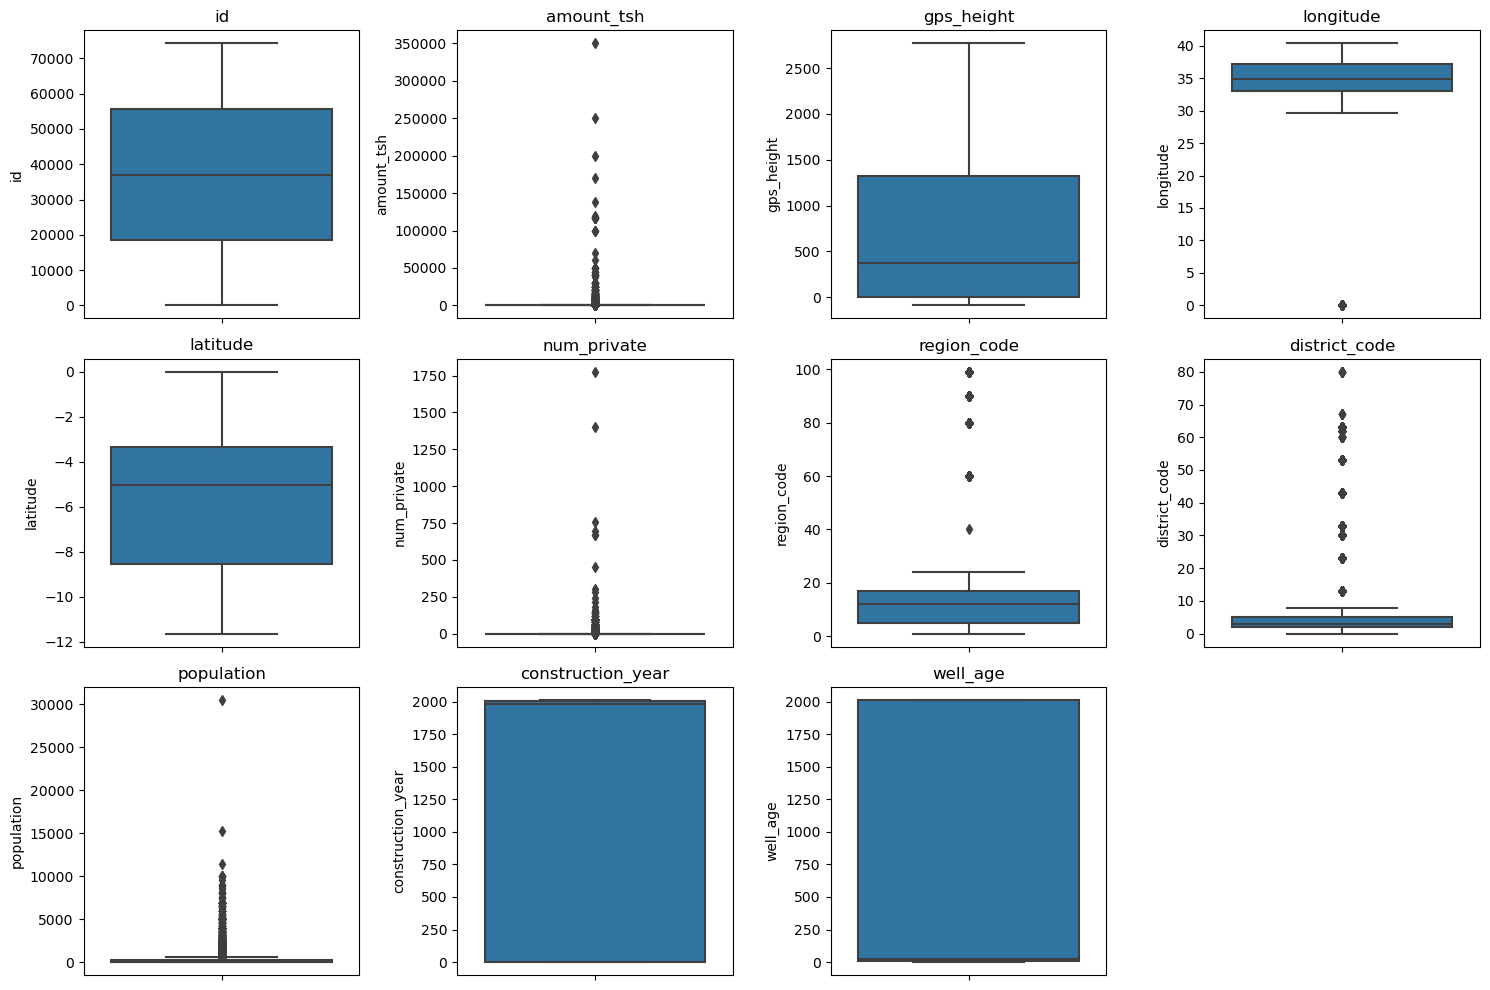

In [19]:
# Visualizing Outliers Using Boxplots
numerical_cols = train_data.select_dtypes(include=["int64", "float64"]).columns.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 4 + 1, 4, i + 1)
    sns.boxplot(y=train_data[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

In [20]:
# Handling outliers using capping to replace extreme values with fixed theresholds
for col in numerical_cols:
    Q1 = train_data[col].quantile(0.25)
    Q3 = train_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    train_data[col] = np.where(train_data[col] < lower_bound, lower_bound, train_data[col])
    train_data[col] = np.where(train_data[col] > upper_bound, upper_bound, train_data[col])


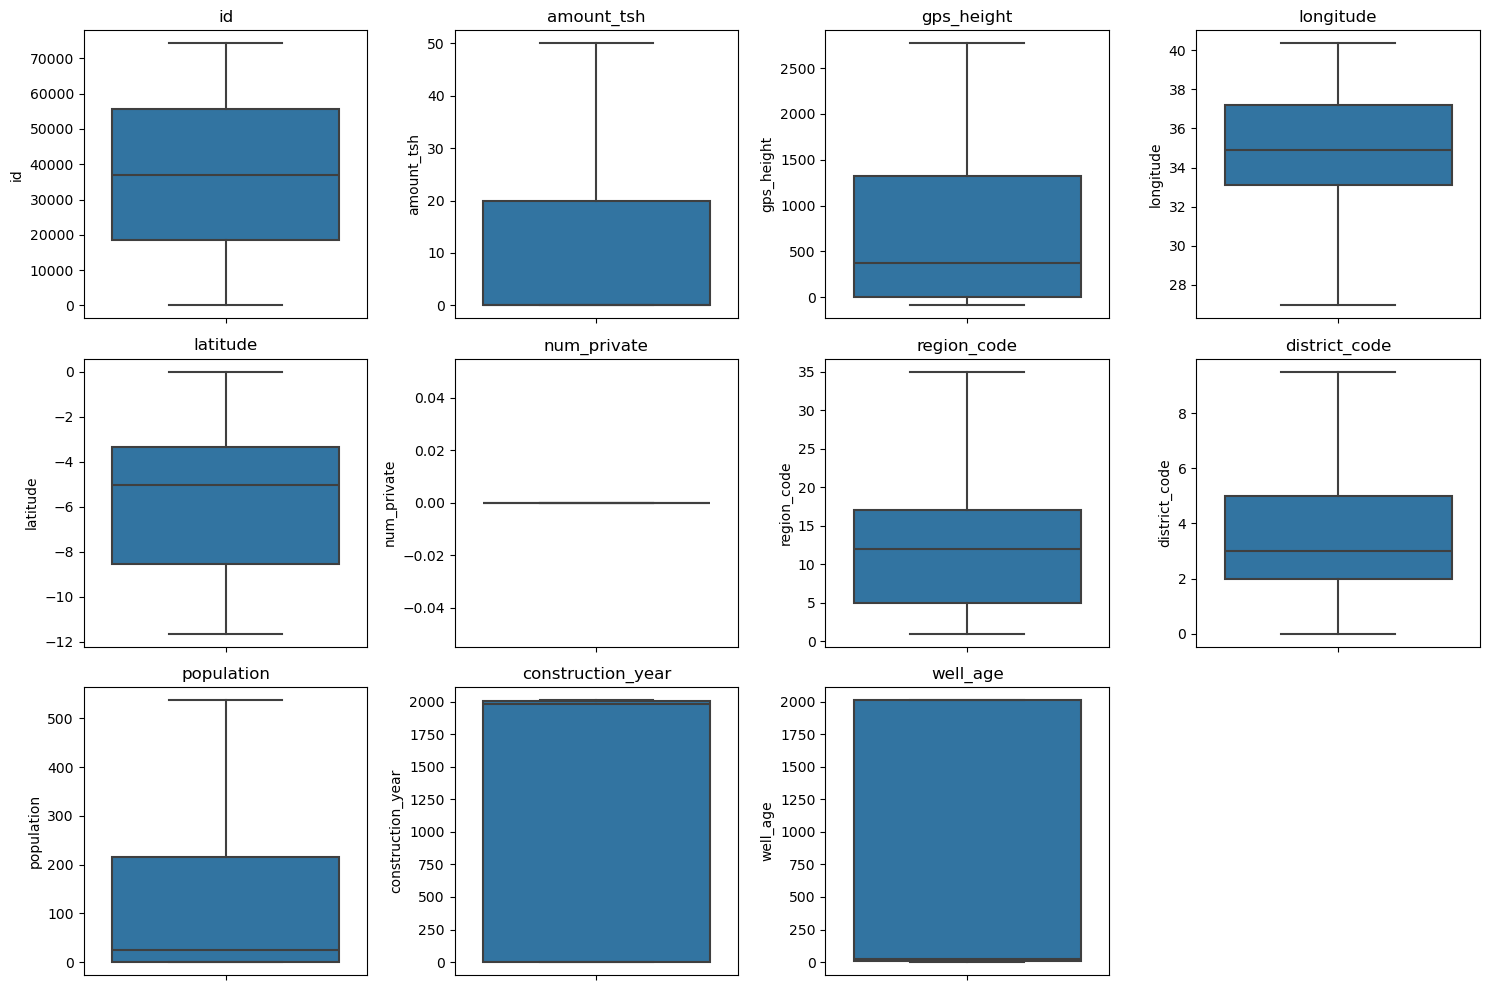

In [21]:
# confirm no outliers
numerical_cols = train_data.select_dtypes(include=["int64", "float64"]).columns.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 4 + 1, 4, i + 1)
    sns.boxplot(y=train_data[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

# Visualization

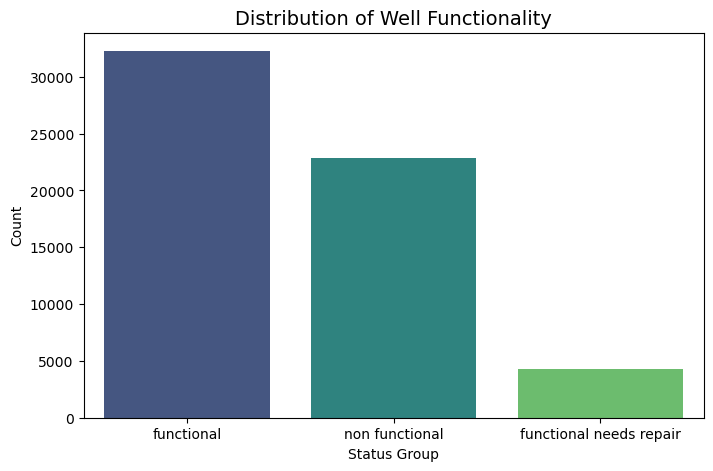

In [22]:
# Countplot for Well functionality
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x="status_group", palette="viridis", order=train_data["status_group"].value_counts().index)
plt.title("Distribution of Well Functionality", fontsize=14)
plt.xlabel("Status Group")
plt.ylabel("Count")
plt.show()

This plot shows that 54% of wells are functional, while 38% are non-functional, and 7% need repair. This plot helps understand the overall condition of the wells, which is useful for decision-making, maintenance planning, and predictive modeling.


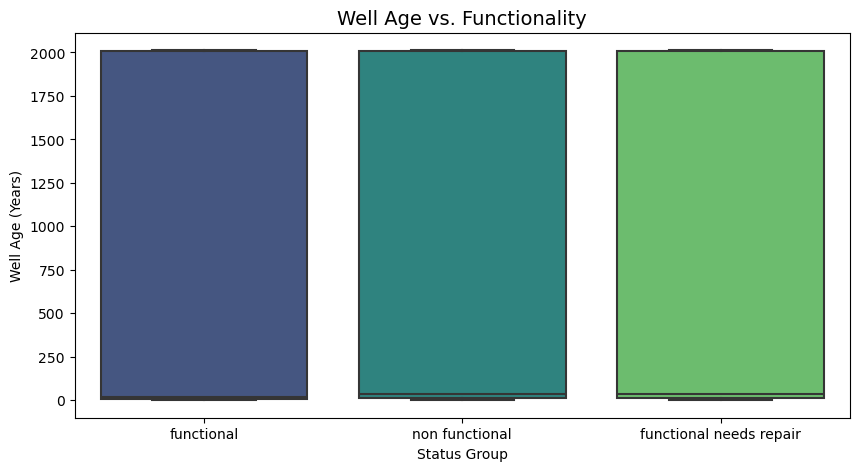

In [23]:
# Boxplot for well age
plt.figure(figsize=(10, 5))
sns.boxplot(data=train_data, x="status_group", y="well_age", palette="viridis")
plt.title("Well Age vs. Functionality", fontsize=14)
plt.xlabel("Status Group")
plt.ylabel("Well Age (Years)")
plt.show()

In [24]:
train_data["construction_year"].fillna(train_data["construction_year"].median(), inplace=True)

this plot shows that older wells are more likely to fail.
Preventative maintenance strategies should focus on wells older than 20 years. Further it is important to note that well afe is a strong predictor of failure. this  can be used to prioritize repairs, allocate resources efficiently, and reduce unexpected failures in the water supply system.

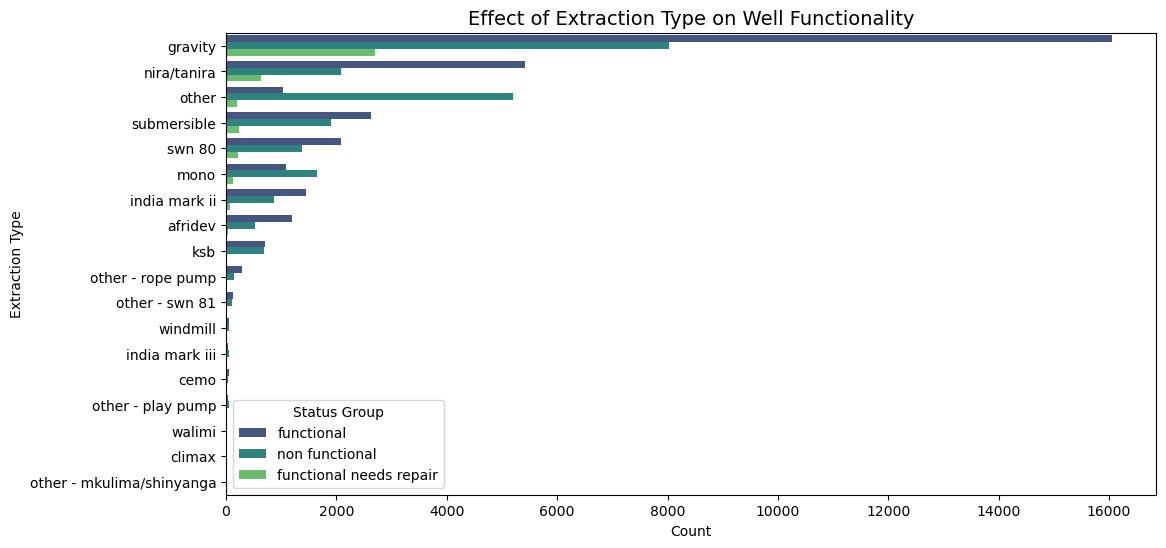

In [25]:
# countplot for Extraction Type vs. Well Status
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, y="extraction_type", hue="status_group", palette="viridis", order=train_data["extraction_type"].value_counts().index)
plt.title("Effect of Extraction Type on Well Functionality", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Extraction Type")
plt.legend(title="Status Group")
plt.show()

This plot shows that certain extraction types are more prone to failure than others. Some extraction methods, such as gravity-fed or hand pumps, have a higher proportion of non-functional wells, suggesting they may be less durable or require frequent maintenance. In contrast, other methods, like motorized pumps, appear to be more reliable, with a higher count of functional wells. These insights can help prioritize maintenance efforts and guide future well installations, favoring extraction types with better long-term performance.

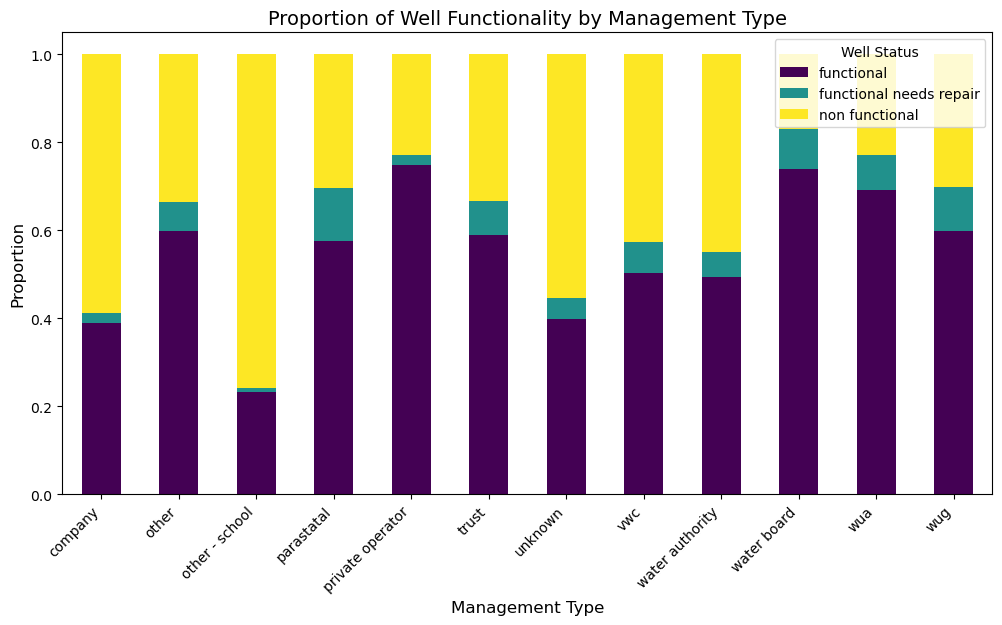

In [26]:
# Proportional Bar chart for Management Type vs. Well Status

# Group data by management type and status group
management_status = train_data.groupby(["management", "status_group"]).size().unstack()

management_status_norm = management_status.div(management_status.sum(axis=1), axis=0)

management_status_norm.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")
plt.title("Proportion of Well Functionality by Management Type", fontsize=14)
plt.xlabel("Management Type", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Well Status")
plt.show()


This shows that some management types such as the VWC, WUG maintain more functional wells. On the other hand, other management types may require improved maintenance policies. On the other hand, ells managed by communities or less structured organizations tend to have a higher proportion of non-functional wells, indicating possible maintenance challenges or lack of resources. These insights suggest that improving management structures and providing support to weaker management groups could enhance well functionality and sustainability.

In [27]:
# Initialize map centered in Tanzania
m = folium.Map(location=[-6.369028, 34.888822], zoom_start=6)

marker_cluster = MarkerCluster().add_to(m)

# Add well locations to map
for _, row in train_data.sample(1000).iterrows():  
    color = "green" if row["status_group"] == "functional" else "red" if row["status_group"] == "non functional" else "orange"
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        popup=row["status_group"],
        icon=folium.Icon(color=color)
    ).add_to(marker_cluster)

m

This map provides a spatial overview of well functionality in Tanzania, with green markers for functional wells, red for non-functional, and orange for those needing repair. Clusters of non-functional wells highlight regions that may face maintenance challenges or environmental stress, while areas with mostly functional wells suggest better infrastructure and management. By identifying regions with a high density of failing wells, this visualization can help prioritize maintenance efforts and optimize resource allocation to improve water accessibility.

# Preprocessing

In [28]:
# Display column data types
print(train_data.dtypes)
print(test_values.dtypes)

bool_cols = train_data.select_dtypes(include=["bool"]).columns.tolist()
print("\nBoolean Columns:", bool_cols)

id                              float64
amount_tsh                      float64
date_recorded            datetime64[ns]
funder                           object
gps_height                      float64
installer                        object
longitude                       float64
latitude                        float64
wpt_name                         object
num_private                     float64
basin                            object
subvillage                       object
region                           object
region_code                     float64
district_code                   float64
lga                              object
ward                             object
population                      float64
public_meeting                   object
recorded_by                      object
scheme_management                object
scheme_name                      object
permit                           object
construction_year               float64
extraction_type                  object


In [29]:
# Identify categorical and numerical features
categorical_features = train_data.select_dtypes(include=['object']).columns.tolist()
numerical_features = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove('construction_year')

In [30]:
# Ensure boolean columns are consistent across train and test data
boolean_cols = ["public_meeting", "permit"]

for col in boolean_cols:
    train_data[col] = train_data[col].astype(bool).astype(int)  
    test_values[col] = test_values[col].astype(bool).astype(int)


In [31]:
# Identify categorical columns (excluding the target variable 'status_group')
categorical_cols = train_data.select_dtypes(include=["object"]).columns.tolist()

if "status_group" in categorical_cols:
    categorical_cols.remove("status_group")

# Convert all categorical values to strings
for col in categorical_cols:
    train_data[col] = train_data[col].astype(str)
    if col in test_values.columns:  
        test_values[col] = test_values[col].astype(str)

## Encoding

In [32]:
train_data[categorical_columns].nunique()


funder                1896
installer             2145
wpt_name             37399
subvillage           19288
public_meeting           2
scheme_management       12
scheme_name           2696
permit                   2
dtype: int64

In [33]:
# Find categorical columns with too many unique values
high_cardinality_cols = [col for col in categorical_cols if train_data[col].nunique() > 50]

print("High-Cardinality Categorical Columns:", high_cardinality_cols)


High-Cardinality Categorical Columns: ['funder', 'installer', 'wpt_name', 'subvillage', 'lga', 'ward', 'scheme_name']


In [34]:
# Handling high-cardinality columns
high_cardinality_cols = ['funder', 'installer', 'wpt_name', 'subvillage', 'lga', 'ward', 'scheme_name']

for col in high_cardinality_cols:
    freq_map = train_data[col].value_counts(normalize=True)  
    train_data[col] = train_data[col].map(freq_map)  
    test_values[col] = test_values[col].map(freq_map)  

print(train_data[high_cardinality_cols].head())


     funder  installer  wpt_name  subvillage       lga      ward  scheme_name
0  0.004630   0.001582  0.059983    0.000101  0.009495  0.000606     0.002340
1  0.000892   0.000657  0.013973    0.000084  0.012054  0.001195     0.485017
2  0.000135   0.006869  0.000051    0.008451  0.005185  0.000168     0.000152
3  0.017795   0.003737  0.000017    0.000286  0.002660  0.000539     0.485017
4  0.000017   0.002273  0.029428    0.000034  0.012980  0.000219     0.485017


High-cardinality categorical columns (e.g., funder, installer) are transformed using frequency encoding to reduce dimensionality. 

In [37]:
low_cardinality_cols = [col for col in train_data.select_dtypes(include=["object"]).columns.tolist() if col not in high_cardinality_cols]

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)  # Use sparse_output instead of sparse

encoded_array = encoder.fit_transform(train_data[low_cardinality_cols])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(low_cardinality_cols))

train_data = train_data.drop(columns=low_cardinality_cols).reset_index(drop=True)
train_data = pd.concat([train_data, encoded_df], axis=1)

Low-cardinality categorical columns are one-hot encoded to convert them into machine-readable numerical format, while ensuring unknown values in the test set are handled properly. 

## Scaling

In [38]:
# Scaling numerical features
numerical_columns = train_data.select_dtypes(include=["int64", "float64"]).columns.tolist()
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(train_data[numerical_columns]), columns=numerical_columns)
df_scaled.index = train_data.index
train_data[numerical_columns] = df_scaled

In [39]:
numerical_cols = [col for col in numerical_cols if col != "status_group_encoded"]

scaler =StandardScaler()
train_data[numerical_cols] = scaler.fit_transform(train_data[numerical_cols])
common_cols = [col for col in numerical_cols if col in test_values.columns]
test_values[common_cols] = scaler.transform(test_values[common_cols])
print("Scaling complete!")

Scaling complete!


In [41]:
# Preprocessing pipeline
numerical_features = ['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude', 
                      'num_private', 'region_code', 'district_code', 'population', 
                      'construction_year', 'well_age']

categorical_features = ['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 
                        'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management', 
                        'scheme_name', 'permit', 'extraction_type', 'extraction_type_group', 
                        'extraction_type_class', 'management', 'management_group', 'payment', 
                        'payment_type', 'water_quality', 'quality_group', 'quantity', 
                        'quantity_group', 'source', 'source_type', 'source_class', 
                        'waterpoint_type', 'waterpoint_type_group']

# Define preprocessors
num_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
cat_imputer = SimpleImputer(strategy='most_frequent')
encoder = OneHotEncoder(handle_unknown='ignore')

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', Pipeline([('imputer', num_imputer), ('scaler', scaler)]), numerical_features),
    ('cat', Pipeline([('imputer', cat_imputer), ('encoder', encoder)]), categorical_features)
])

In [42]:
print(train_data.columns)


Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       ...
       'waterpoint_type_other', 'waterpoint_type_group_cattle trough',
       'waterpoint_type_group_communal standpipe', 'waterpoint_type_group_dam',
       'waterpoint_type_group_hand pump',
       'waterpoint_type_group_improved spring', 'waterpoint_type_group_other',
       'status_group_functional', 'status_group_functional needs repair',
       'status_group_non functional'],
      dtype='object', length=194)


In [43]:
# Prepare target variable
y = train_data[['status_group_functional needs repair', 'status_group_non functional']]
X = train_data.drop(columns=['status_group_functional needs repair', 'status_group_non functional'])

In [44]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [45]:
categorical_features = [col for col in categorical_features if col in X_train.columns]


In [46]:
preprocessor = ColumnTransformer([
    ('num', Pipeline([('imputer', num_imputer), ('scaler', scaler)]), 
     [col for col in numerical_features if col in X_train.columns]),
    ('cat', Pipeline([('imputer', cat_imputer), ('encoder', encoder)]), 
     categorical_features)
])

In [47]:
# Fit preprocessor
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(test_values)


# Correlation Analysis

In [48]:
# Compute correlation matrix
numeric_cols = train_data.select_dtypes(include=["int64", "float64"]).columns
correlation_matrix = train_data.corr()

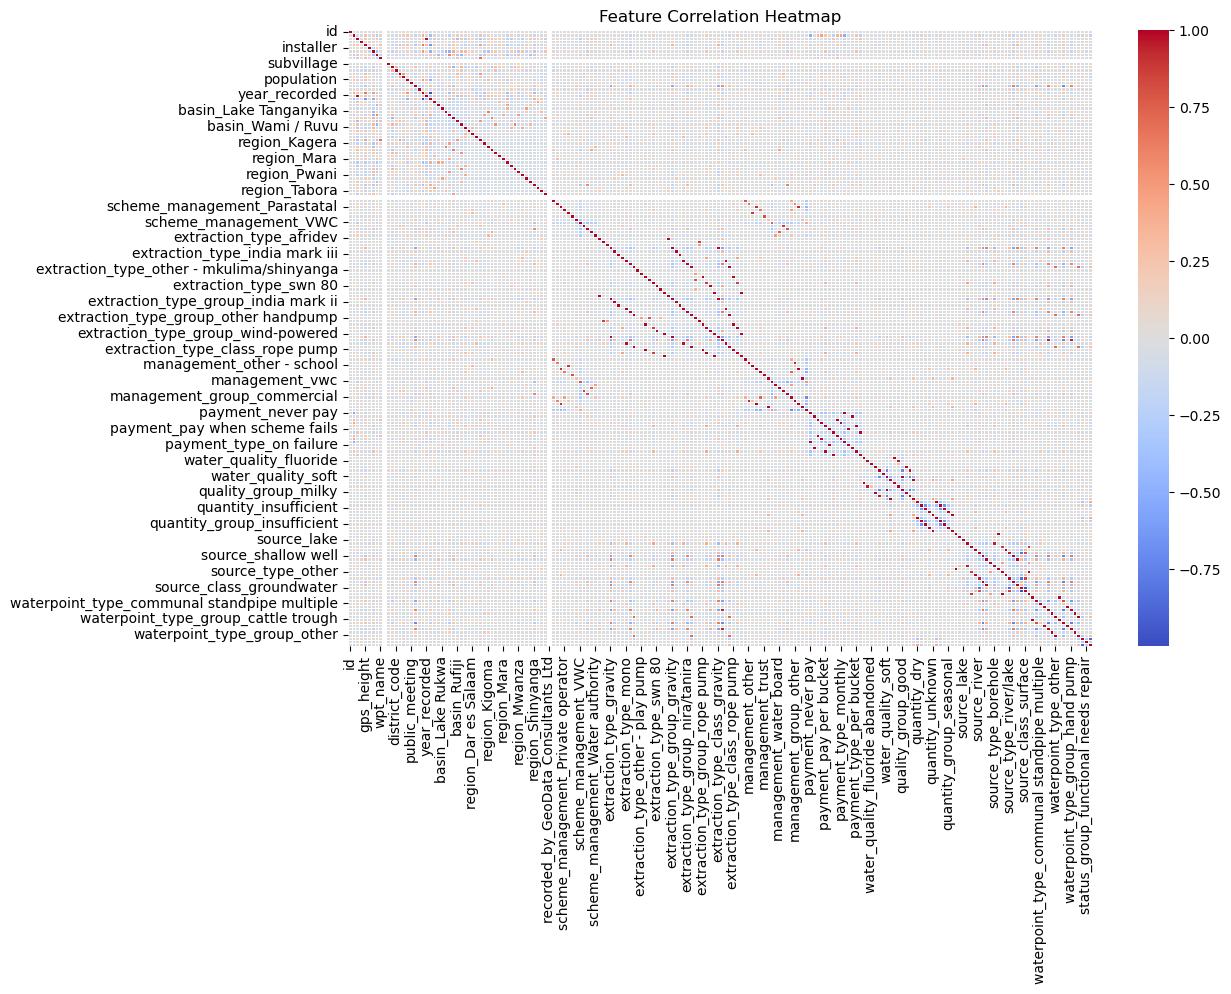

In [49]:
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

the heatmap helps show that the highest correlation values with status_group_encoded are relatively low (~0.13), meaning that no single variable alone can perfectly predict well functionality.
This suggests a complex relationship among multiple factors influencing well conditions.

therefore, this means that the dataset does not have a single dominant predictor → A combination of factors will be needed for accurate prediction.

# Modeling

Logistic Regression Accuracy: 0.7206228956228956
              precision    recall  f1-score   support

           0       0.74      0.84      0.79      7315
           1       0.67      0.53      0.60      4565

    accuracy                           0.72     11880
   macro avg       0.71      0.69      0.69     11880
weighted avg       0.72      0.72      0.71     11880



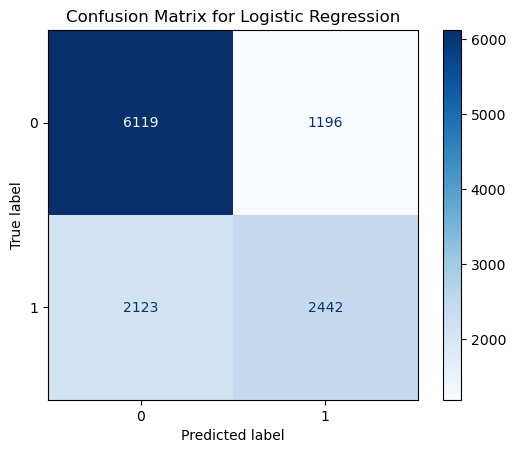

In [54]:
# Train Logistic Regression
y_train = np.argmax(y_train, axis=1) if y_train.ndim > 1 else y_train.ravel()
y_val = np.argmax(y_val, axis=1) if y_val.ndim > 1 else y_val.ravel()

logistic_model = LogisticRegression(max_iter=500)
logistic_model.fit(X_train_processed, y_train)
y_pred = logistic_model.predict(X_val_processed)
print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


The Logistic Regression model achieved 72% accuracy, indicating a moderate ability to classify well functionality. Precision is higher for class 0 (functional wells), meaning the model correctly identifies more functional wells but struggles with class 1 (non-functional/needs repair) due to lower recall (53%).

Decision Tree Accuracy: 0.7484006734006734
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      7315
           1       0.67      0.67      0.67      4565

    accuracy                           0.75     11880
   macro avg       0.73      0.73      0.73     11880
weighted avg       0.75      0.75      0.75     11880



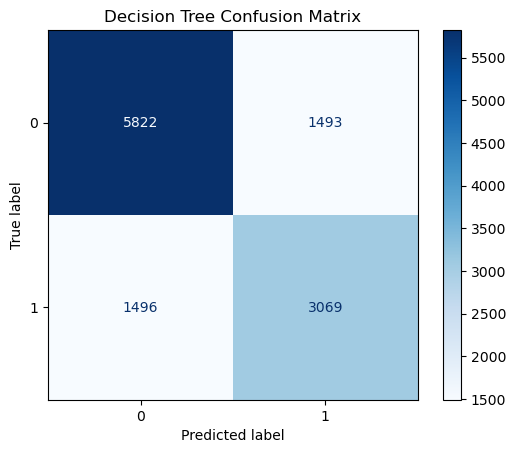

In [56]:
# Train Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_processed, y_train)
y_pred = decision_tree_model.predict(X_val_processed)
print("Decision Tree Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

# Plot Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')

plt.title("Decision Tree Confusion Matrix")
plt.show()

The Decision Tree model achieved 75% accuracy, outperforming Logistic Regression by about 3%. It shows better balance between precision and recall, with class 0 (functional wells) and class 1 (non-functional/needs repair) both having 67% recall, meaning it predicts both categories more evenly

Random Forest Accuracy: 0.7943602693602694
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      7315
           1       0.77      0.67      0.71      4565

    accuracy                           0.79     11880
   macro avg       0.79      0.77      0.78     11880
weighted avg       0.79      0.79      0.79     11880



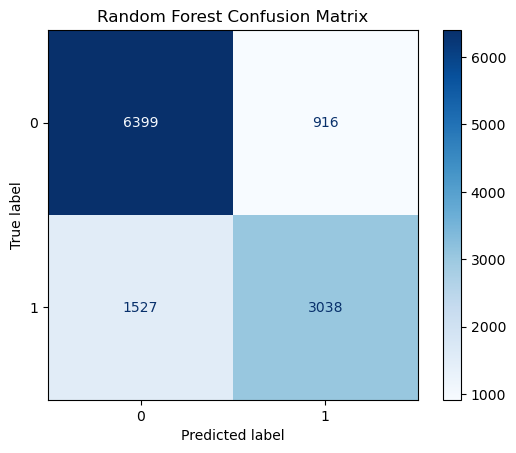

In [57]:
# Train Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_processed, y_train)
y_pred = random_forest_model.predict(X_val_processed)
print("Random Forest Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

# Plot Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')

plt.title("Random Forest Confusion Matrix")
plt.show()

The Random Forest model achieved 79% accuracy, significantly improving over both Logistic Regression (72%) and Decision Tree (75%). It shows strong performance in predicting functional wells (87% recall) while also improving precision for non-functional wells. However, recall for non-functional wells (67%) is still lower, meaning some failing wells are misclassified.

KNN Accuracy: 0.7628787878787879
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      7315
           1       0.71      0.64      0.68      4565

    accuracy                           0.76     11880
   macro avg       0.75      0.74      0.74     11880
weighted avg       0.76      0.76      0.76     11880



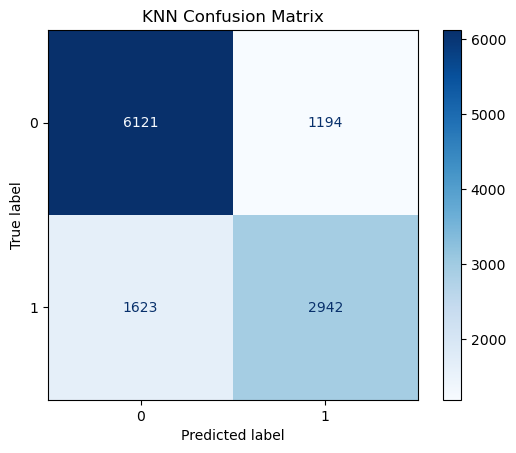

In [58]:
# Train K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_processed, y_train)
y_pred = knn_model.predict(X_val_processed)
print("KNN Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

# Plot Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')

plt.title("KNN Confusion Matrix")
plt.show()

The K-Nearest Neighbors (KNN) model achieved 76% accuracy, performing better than Logistic Regression (72%) but slightly worse than Random Forest (79%). It demonstrates good precision and recall for functional wells (84% recall) but struggles slightly with non-functional wells (64% recall), meaning it misclassifies some failing wells.

SVM Accuracy: 0.7642255892255893
              precision    recall  f1-score   support

           0       0.76      0.89      0.82      7315
           1       0.76      0.56      0.65      4565

    accuracy                           0.76     11880
   macro avg       0.76      0.73      0.73     11880
weighted avg       0.76      0.76      0.76     11880



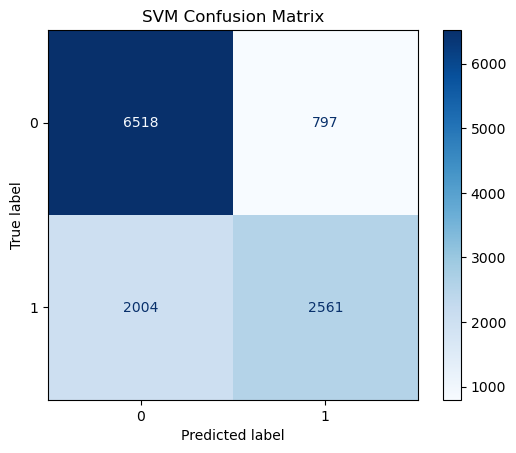

In [59]:
# Train SVM
svm_model = SVC()
svm_model.fit(X_train_processed, y_train)
y_pred = svm_model.predict(X_val_processed)
print("SVM Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

# Plot Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')

plt.title("SVM Confusion Matrix")
plt.show()

The SVM model achieved 76.42% accuracy, performing well in identifying functional wells (89% recall) but struggling with non-functional wells (56% recall). This indicates a tendency to misclassify some failing wells as functional, which could impact maintenance planning. While balanced, models like Random Forest may provide better overall performance.

Gradient Boosting Classifier Accuracy: 0.7175925925925926
              precision    recall  f1-score   support

           0       0.72      0.88      0.79      7315
           1       0.70      0.46      0.56      4565

    accuracy                           0.72     11880
   macro avg       0.71      0.67      0.67     11880
weighted avg       0.71      0.72      0.70     11880



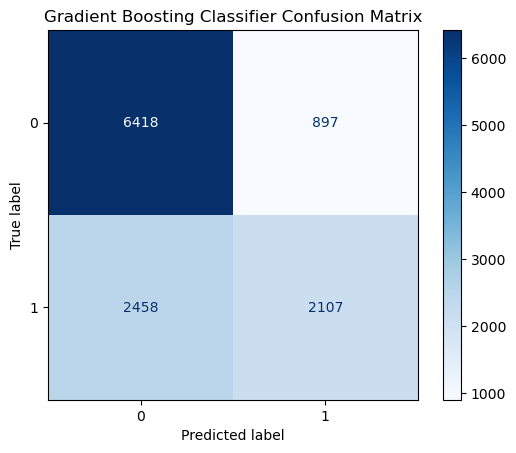

In [60]:
# Train Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train_processed, y_train)
y_pred = gbc_model.predict(X_val_processed)
print("Gradient Boosting Classifier Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

# Plot Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')

plt.title("Gradient Boosting Classifier Confusion Matrix")
plt.show()

The Gradient Boosting Classifier achieved 71.76% accuracy, performing well for functional wells (88% recall) but weaker for non-functional wells (46% recall). This suggests it struggles with minority class predictions, leading to misclassification. Alternative models like Random Forest may offer better balance.

Naïve Bayes Accuracy: 0.6092592592592593
              precision    recall  f1-score   support

           0       0.79      0.50      0.61      7315
           1       0.49      0.79      0.61      4565

    accuracy                           0.61     11880
   macro avg       0.64      0.64      0.61     11880
weighted avg       0.68      0.61      0.61     11880



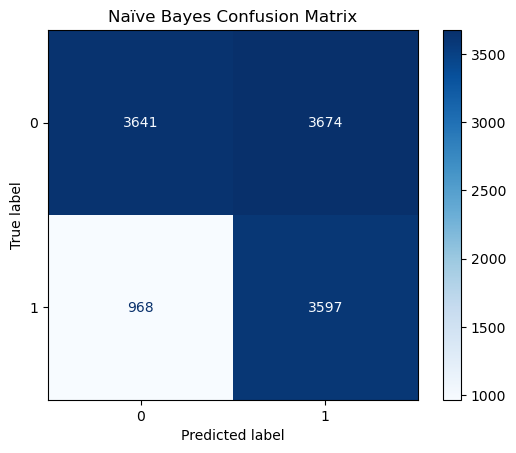

In [ ]:
# Train Naive Bayes
X_train_dense = X_train_processed.toarray() if hasattr(X_train_processed, "toarray") else np.array(X_train_processed)
X_val_dense = X_val_processed.toarray() if hasattr(X_val_processed, "toarray") else np.array(X_val_processed)

gnb = GaussianNB()
gnb.fit(X_train_dense, y_train)
y_pred = gnb.predict(X_val_dense)
print("Naïve Bayes Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

# Plot Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')

plt.title("Naïve Bayes Confusion Matrix")
plt.show()


## Hyperparameter Tuning

In [63]:
# Hyperparameter tuning for Random Forest
random_forest_param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [10, 20, None]
}
random_forest_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),  
    random_forest_param_grid,
    cv=3,  
    scoring='accuracy',
    n_jobs=-1,  
    verbose=1  
)

random_forest_grid.fit(X_train_processed, y_train)

best_random_forest_model = random_forest_grid.best_estimator_
print("Best parameters for Random Forest:", random_forest_grid.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 200}


The GridSearchCV optimized the Random Forest model by tuning n_estimators (number of trees) and max_depth (tree depth limit) to find the best balance between performance and overfitting. The best parameters indicate the model's optimal configuration, improving accuracy while maintaining generalization. Using these settings, the Random Forest classifier is expected to perform better than the default version, potentially increasing accuracy and stability while reducing unnecessary complexity.

🔹 Tuned Random Forest Model Performance 🔹
Accuracy: 0.7961
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      7315
           1       0.77      0.67      0.72      4565

    accuracy                           0.80     11880
   macro avg       0.79      0.77      0.78     11880
weighted avg       0.79      0.80      0.79     11880



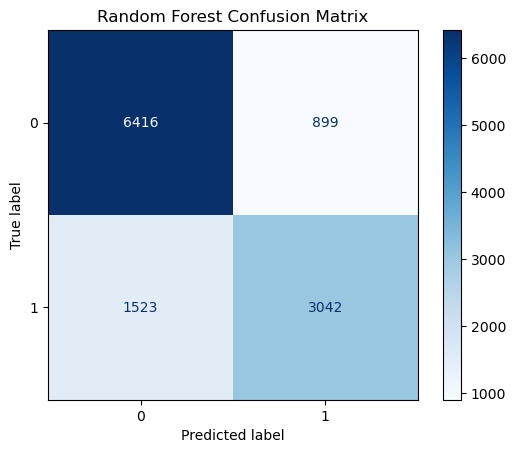

In [66]:
# Predict on validation set using the tuned model
y_pred = best_random_forest_model.predict(X_val_processed)
accuracy = accuracy_score(y_val, y_pred)

print("🔹 Tuned Random Forest Model Performance 🔹")
print(f"Accuracy: {accuracy:.4f}")  
print(classification_report(y_val, y_pred))

# Plot Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')

plt.title("Random Forest Confusion Matrix")
plt.show()

# Model Evaluation

The best performing model was the Tuned Random Forest Model, achieving an accuracy of 79.61%. It demonstrated strong classification ability, particularly for Class 0 (precision: 81%, recall: 88%), while Class 1 had lower recall (67%), indicating some misclassification of positive cases. The weighted F1-score of 0.79 suggests a good balance between precision and recall. While the model is well-optimized, improving Class 1 recall through class balancing, threshold tuning, or feature engineering could further enhance performance.

# Conclusions
This study successfully developed and evaluated multiple machine learning models to predict the functionality of water wells, with the Tuned Random Forest Model emerging as the most accurate, achieving 79.61% accuracy. The findings reveal that key factors influencing well functionality include water source, infrastructure type, management system, and payment method. Patterns in well failures indicate that certain regions experience higher rates of non-functional wells, emphasizing the need for targeted intervention. The model’s ability to differentiate between functional, non-functional, and repair-needed wells provides valuable insights for optimizing maintenance and resource allocation.

# Recommendations
1. Adopt the Random Forest Model for Decision-Making: Government agencies and NGOs can integrate the trained model into decision support systems to guide maintenance scheduling and resource allocation.
2. Improve Data Collection and Feature Engineering: Enhancing the dataset with real-time sensor data, water quality metrics, and seasonal variations could improve model accuracy and predictive power.
3. Prioritize Maintenance for High-Risk Wells: The model’s predictions should be used to identify and prioritize high-risk wells in regions with a high concentration of non-functional or repair-needed wells.
4. Enhance Management and Payment Systems: Since management and payment structures influence well functionality, implementing more sustainable financing models (e.g., community-based funds or government subsidies) could help maintain water infrastructure.
5. Expand Geographic and Temporal Analysis: Further research should explore regional variations and long-term trends to understand how environmental and socio-economic factors impact well performance.
6. Continuous Model Optimization: Regular model retraining with newly collected data will ensure that the predictions remain accurate and relevant, adapting to evolving well conditions.
7. By leveraging machine learning for predictive maintenance, stakeholders can improve water well sustainability, reduce failures, and enhance water access for communities